# **LABORATORIO PARA ANALISIS DE SENTIMIENTOS**

**EQUIPO No. 7**

*   Jonnathan Alexander Perez Ochoa
*   Daniel Alejandro Soto Mogollón
*   Brayan Camilo Salazar González
*   Jhoan Sebastian Riaño Herrera
*   Joseph Oswald Quiroz Mejía












In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Instalación de las librerías necesarias
!pip install pandas openpyxl textblob nltk

In [3]:
!pip install pysentimiento

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (73

In [4]:
from pysentimiento import create_analyzer
import transformers

transformers.logging.set_verbosity(transformers.logging.ERROR)

analyzer = create_analyzer(task="sentiment", lang="es")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/925 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [5]:
# Importación de las librerías
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
# Carga del archivo Excel
noticias = pd.read_excel('/content/drive/MyDrive/DATA_2/Noticias2ver.xlsx')

# Asegurarte de que el archivo se ha cargado correctamente
print(noticias.head())


   Columna1                                             Título  \
0         0  ¿Cómo potencializar las ventas de un emprendim...   
1         1  Así apoyará Corea del Sur al país para enfrent...   
2         2  Nanotecnología, una receta para cultivos más s...   
3         3  Desorden de padres, causa de nueva jornada de ...   
4         4  Senado, citado para el 13 de abril, cuando ter...   

                                                info  \
0  La época de crisis de salud por coronavirus es...   
1  El Presidente aseguró que ya le han devuelto e...   
2  Los resultados están acompañados del llamado d...   
3  Secretaría de Educación insiste en que se lleg...   
4  Así lo anunció el presidente del Senado, Lidio...   

                                           contenido                Tipo  
0  En medio de la coyuntura ocasionada por la pro...            economia  
1  Este jueves, en el noveno día de cuarentena na...  Politica y Opinion  
2  Jenny Prieto y Álex Caro son una parej

In [9]:
# Extracción de la columna 'contenido'
contenido = noticias['contenido'].dropna()  # Elimina filas sin datos

# Limpieza de texto
import re
from nltk.corpus import stopwords

def limpiar_texto(texto):
    texto = re.sub(r'http\S+|www\S+|https\S+', '', texto, flags=re.MULTILINE)
    texto = re.sub(r'\@w+|\#','', texto)
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = " ".join(word for word in texto.split() if word not in stopwords.words('spanish'))
    return texto

# Aplicar la función de limpieza a cada texto
noticias['contenido_limpio'] = contenido.apply(limpiar_texto)
contenido_limpio = contenido.apply(limpiar_texto)


**Realizar el analisis de sentimiento utilizando la librería TextBlob para procesamiento de NLP**


In [10]:
# Análisis de sentimiento usando TextBlob
def analizar_sentimiento(texto):
    analysis = TextBlob(texto)
    if analysis.sentiment.polarity > 0:
        return 'Positivo'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negativo'

# Aplicar análisis de sentimientos al contenido limpio
sentimientos = contenido_limpio.apply(analizar_sentimiento)


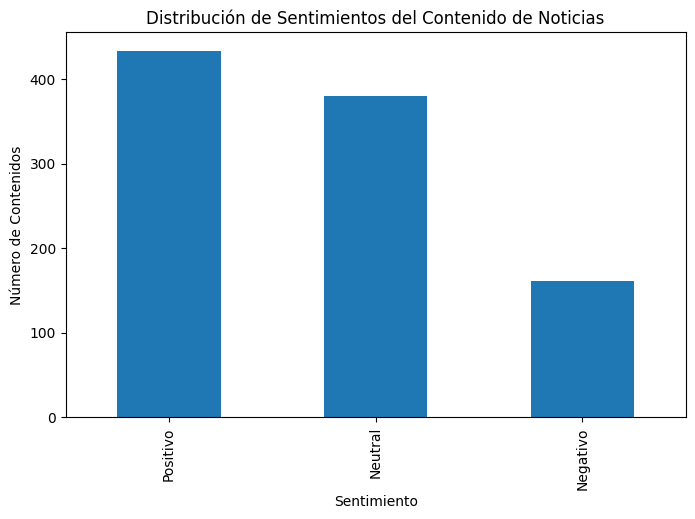

In [11]:
# Crear un DataFrame para los resultados
df_resultados = pd.DataFrame(list(zip(contenido_limpio, sentimientos)), columns=['Contenido', 'Sentimiento'])

# Contar la cantidad de cada tipo de sentimiento
conteo_sentimientos = df_resultados['Sentimiento'].value_counts()

# Visualización de los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
conteo_sentimientos.plot(kind='bar')
plt.title('Distribución de Sentimientos del Contenido de Noticias')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Contenidos')
plt.show()


**Analisis de emociones con la librería Pysentimiento**

In [12]:
emotion_analyzer = create_analyzer(task="emotion", lang="en")

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [17]:
# prueba_data = contenido_limpio.head(100) # Prueba con los primeros 100 registros del DataSet
contenido_limpio # Totalidad de registros del DataSet

In [18]:
# emotion_analyzer.predict(prueba_data) # Realizar el analisis con los primeros 100 registros
emotion_analyzer.predict(contenido_limpio) # Realizar el analisis con todos los registros del DataSet

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

[AnalyzerOutput(output=others, probas={others: 0.975, disgust: 0.012, joy: 0.006, anger: 0.003, fear: 0.002, sadness: 0.002, surprise: 0.002}),
 AnalyzerOutput(output=others, probas={others: 0.950, disgust: 0.034, anger: 0.005, joy: 0.005, fear: 0.002, sadness: 0.002, surprise: 0.002}),
 AnalyzerOutput(output=others, probas={others: 0.973, disgust: 0.013, joy: 0.006, anger: 0.003, surprise: 0.002, fear: 0.002, sadness: 0.001}),
 AnalyzerOutput(output=others, probas={others: 0.925, disgust: 0.058, anger: 0.005, joy: 0.005, sadness: 0.003, fear: 0.002, surprise: 0.002}),
 AnalyzerOutput(output=others, probas={others: 0.947, disgust: 0.037, anger: 0.005, joy: 0.005, fear: 0.002, surprise: 0.002, sadness: 0.002}),
 AnalyzerOutput(output=others, probas={others: 0.976, disgust: 0.010, joy: 0.006, anger: 0.003, surprise: 0.002, fear: 0.002, sadness: 0.002}),
 AnalyzerOutput(output=others, probas={others: 0.970, disgust: 0.016, joy: 0.005, anger: 0.003, fear: 0.003, sadness: 0.002, surprise: 0

**Analisis de odio con Pysentimiento (Hate Speech)**

In [19]:
hate_speech_analyzer = create_analyzer(task="hate_speech", lang="es")

config.json:   0%|          | 0.00/956 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [22]:
# hate_speech_analyzer.predict("Esto es una mierda pero no es odio") # Prueba para texto o frases dentro del parametro de la función
# hate_speech_analyzer.predict(prueba_data) # Prueba para los primeros 100 registros del DataSet
hate_speech_analyzer.predict(contenido_limpio) # Prueba para todos los registros del DataSet

Map:   0%|          | 0/975 [00:00<?, ? examples/s]

[AnalyzerOutput(output=['hateful'], probas={hateful: 0.618, targeted: 0.004, aggressive: 0.179}),
 AnalyzerOutput(output=[], probas={hateful: 0.069, targeted: 0.005, aggressive: 0.024}),
 AnalyzerOutput(output=[], probas={hateful: 0.072, targeted: 0.004, aggressive: 0.023}),
 AnalyzerOutput(output=[], probas={hateful: 0.034, targeted: 0.004, aggressive: 0.020}),
 AnalyzerOutput(output=[], probas={hateful: 0.126, targeted: 0.007, aggressive: 0.039}),
 AnalyzerOutput(output=[], probas={hateful: 0.045, targeted: 0.009, aggressive: 0.016}),
 AnalyzerOutput(output=[], probas={hateful: 0.162, targeted: 0.004, aggressive: 0.057}),
 AnalyzerOutput(output=[], probas={hateful: 0.088, targeted: 0.021, aggressive: 0.047}),
 AnalyzerOutput(output=[], probas={hateful: 0.229, targeted: 0.008, aggressive: 0.072}),
 AnalyzerOutput(output=[], probas={hateful: 0.054, targeted: 0.005, aggressive: 0.020}),
 AnalyzerOutput(output=[], probas={hateful: 0.073, targeted: 0.006, aggressive: 0.030}),
 AnalyzerOut